# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1098]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\annat\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1099]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [1100]:
import numpy as np
import polars as pl 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
import gc


# import ...  # your favorite data package
# import ...  # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [1101]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pl.read_csv('train.csv')
print(df)

shape: (1_458_644, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ dropoff_d ┆ … ┆ dropoff_l ┆ dropoff_l ┆ store_and ┆ trip_dur │
│ ---       ┆ ---       ┆ tetime    ┆ atetime   ┆   ┆ ongitude  ┆ atitude   ┆ _fwd_flag ┆ ation    │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆ str       ┆ str       ┆   ┆ f64       ┆ f64       ┆ str       ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 2016-03-1 ┆ … ┆ -73.96463 ┆ 40.765602 ┆ N         ┆ 455      │
│           ┆           ┆ 4         ┆ 4         ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ 17:24:55  ┆ 17:32:30  ┆   ┆           ┆           ┆           ┆          │
│ id2377394 ┆ 1         ┆ 2016-06-1 ┆ 2016-06-1 ┆ … ┆ -73.99948 ┆ 40

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [1102]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\
df = df.drop("dropoff_datetime")
df = df.with_columns(pl.col("pickup_datetime").str.to_datetime().cast(pl.Datetime()))
print(df)

shape: (1_458_644, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ passenger ┆ … ┆ dropoff_l ┆ dropoff_l ┆ store_and ┆ trip_dur │
│ ---       ┆ ---       ┆ tetime    ┆ _count    ┆   ┆ ongitude  ┆ atitude   ┆ _fwd_flag ┆ ation    │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆ datetime[ ┆ i64       ┆   ┆ f64       ┆ f64       ┆ str       ┆ i64      │
│           ┆           ┆ μs]       ┆           ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 1         ┆ … ┆ -73.96463 ┆ 40.765602 ┆ N         ┆ 455      │
│           ┆           ┆ 4         ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ 17:24:55  ┆           ┆   ┆           ┆   

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

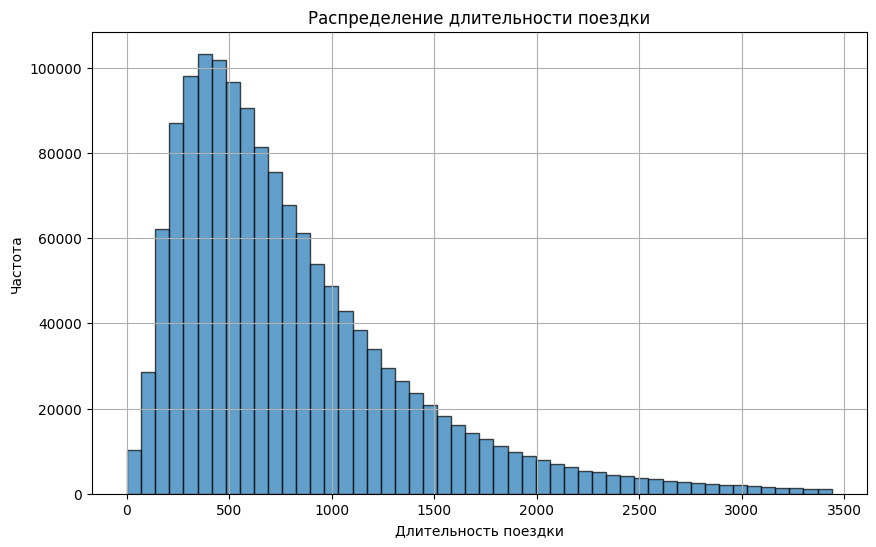

6453

In [1103]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
trip_duration = df.select(pl.col("trip_duration")).to_pandas()

# Удалим выбросы, оставив данные до 99-го процентиля
upper_limit = trip_duration["trip_duration"].quantile(0.99)
filtered_trip_duration = trip_duration[trip_duration["trip_duration"] <= upper_limit]

plt.figure(figsize=(10, 6))
plt.hist(filtered_trip_duration["trip_duration"], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение длительности поездки')
plt.xlabel('Длительность поездки')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
gc.collect()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Большинство поездок имеют относительно короткую продолжительность, около 300-700 секунд. В данных могут присутствовать выбросы, так как небольшое количество поездок продолжается более 2500 секунд.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

 RMSLE более устойчив к большим выбросам в целевой переменной, чем RMSE, а в данной выборке достаточно много выбросов
 

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$
$$\text{MSE}(X, \hat{y}, \hat{a}) = {\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

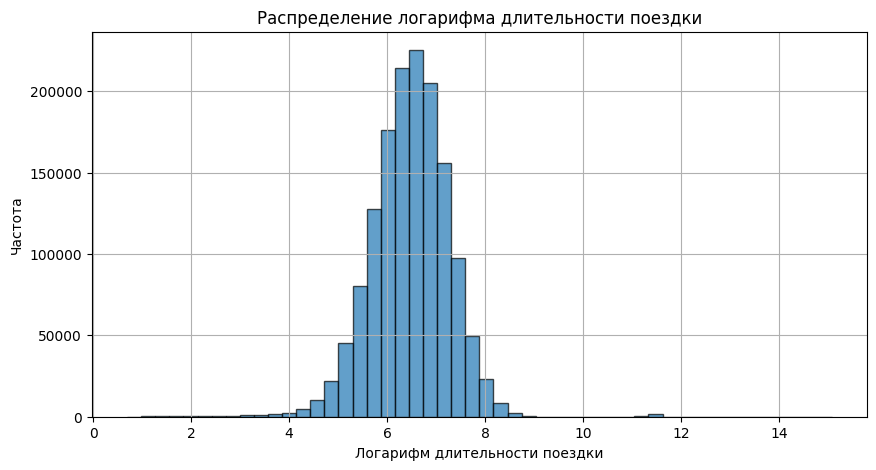

6319

In [1104]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.with_columns(pl.Series(np.log1p(df["trip_duration"].to_numpy())).alias("log_trip_duration")) # Добавляем колонку log_trip_duration
df = df.drop("trip_duration")

log_trip_duration = df.select(pl.col("log_trip_duration")).to_pandas()
plt.figure(figsize=(10, 5))
plt.hist(log_trip_duration["log_trip_duration"], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение логарифма длительности поездки')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
gc.collect()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [1105]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))


rmsle_best_const = rmsle(df.select(pl.col("log_trip_duration")).to_numpy().flatten(), 
                         np.log1p(np.full(len(df), np.exp(df.select(pl.col("log_trip_duration")).mean()) - 1))) # Среднее значение логарифма длительности поездки
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)
gc.collect()

0.7957592365411508


0

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

C:\Users\annat\AppData\Local\Temp\ipykernel_26416\478811665.py:2: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  cs = df.group_by(pl.col("pickup_datetime").dt.date().alias("day")).count().sort("day") # Считаем количество поездок в определенный день


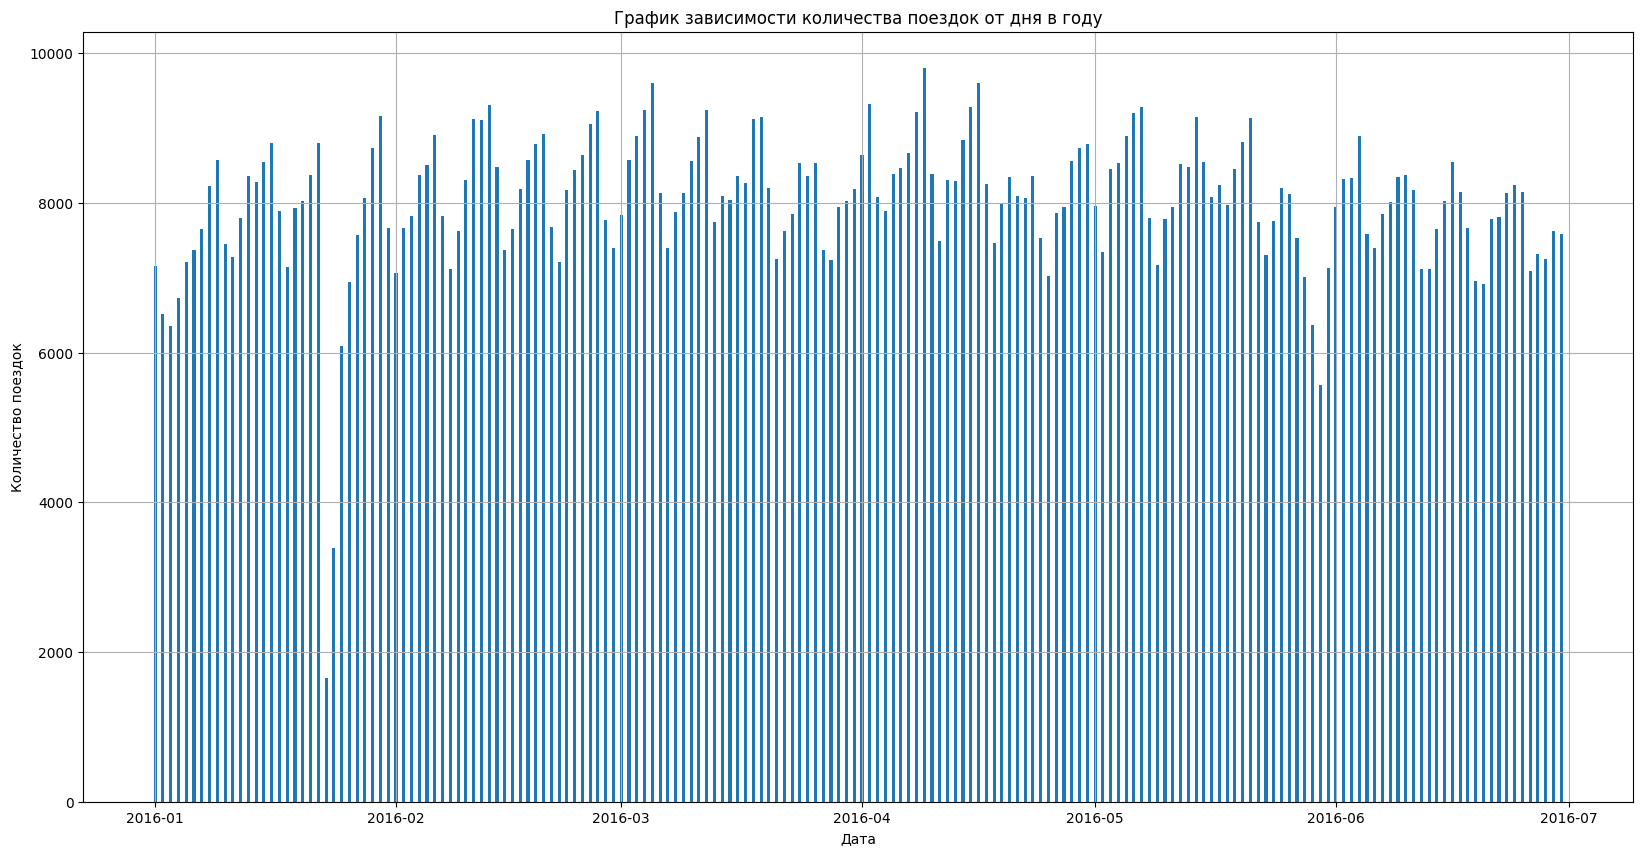

0

In [1106]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
cs = df.group_by(pl.col("pickup_datetime").dt.date().alias("day")).count().sort("day") # Считаем количество поездок в определенный день

fig = plt.figure(figsize = (20, 10))
plt.bar(cs["day"], cs["count"], width = 0.4)
plt.xlabel("Дата")
plt.ylabel("Количество поездок")
plt.title("График зависимости количества поездок от дня в году")
plt.grid(True)
plt.show()
gc.collect()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

shape: (3, 2)
┌────────────┬───────┐
│ day        ┆ count │
│ ---        ┆ ---   │
│ date       ┆ u32   │
╞════════════╪═══════╡
│ 2016-01-23 ┆ 1648  │
│ 2016-01-24 ┆ 3383  │
│ 2016-05-30 ┆ 5570  │
└────────────┴───────┘


C:\Users\annat\AppData\Local\Temp\ipykernel_26416\3494973778.py:4: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  cs_day = df.group_by(pl.col("pickup_datetime").dt.weekday().alias("day")).count().sort("day") # Группируем по дню недели
C:\Users\annat\AppData\Local\Temp\ipykernel_26416\3494973778.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  cs_hour = df.group_by(pl.col("pickup_datetime").dt.hour().alias("hour")).count().sort("hour") # Группируем по часу


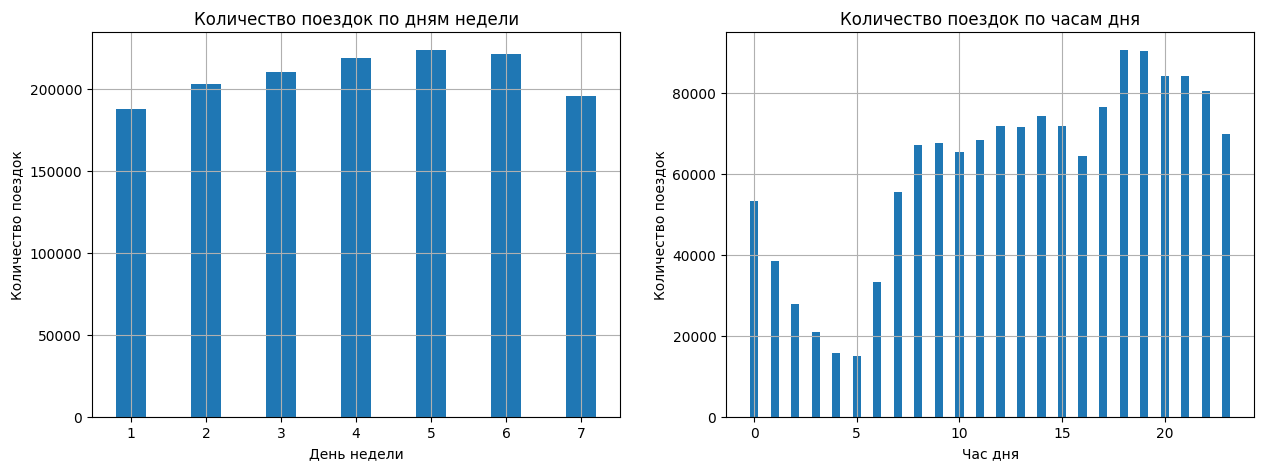

21796

In [1107]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(cs.sort("count").head(3)) # выводим дни с минимальными поездками

cs_day = df.group_by(pl.col("pickup_datetime").dt.weekday().alias("day")).count().sort("day") # Группируем по дню недели 
cs_hour = df.group_by(pl.col("pickup_datetime").dt.hour().alias("hour")).count().sort("hour") # Группируем по часу 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.grid(True)
ax[0].bar(cs_day["day"], cs_day["count"], width=0.4)
ax[0].set_xlabel("День недели")
ax[0].set_ylabel("Количество поездок")
ax[0].set_title("Количество поездок по дням недели")
ax[0].grid(True) 
ax[1].bar(cs_hour["hour"], cs_hour["count"], width=0.4)
ax[1].set_xlabel("Час дня")
ax[1].set_ylabel("Количество поездок")
ax[1].set_title("Количество поездок по часам дня")
ax[1].grid(True)
plt.show()
gc.collect()

23.01.2016 в Нью Йорке запретили дорожное движение из-за снегопада.
30.05.2016 День Памяти проходят парады

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

C:\Users\annat\AppData\Local\Temp\ipykernel_26416\3479214398.py:8: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  hourly_by_month = df3.group_by(["hour", "month"]).count()
C:\Users\annat\AppData\Local\Temp\ipykernel_26416\3479214398.py:9: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  hourly_by_weekday = df3.group_by(["hour", "weekday"]).count()


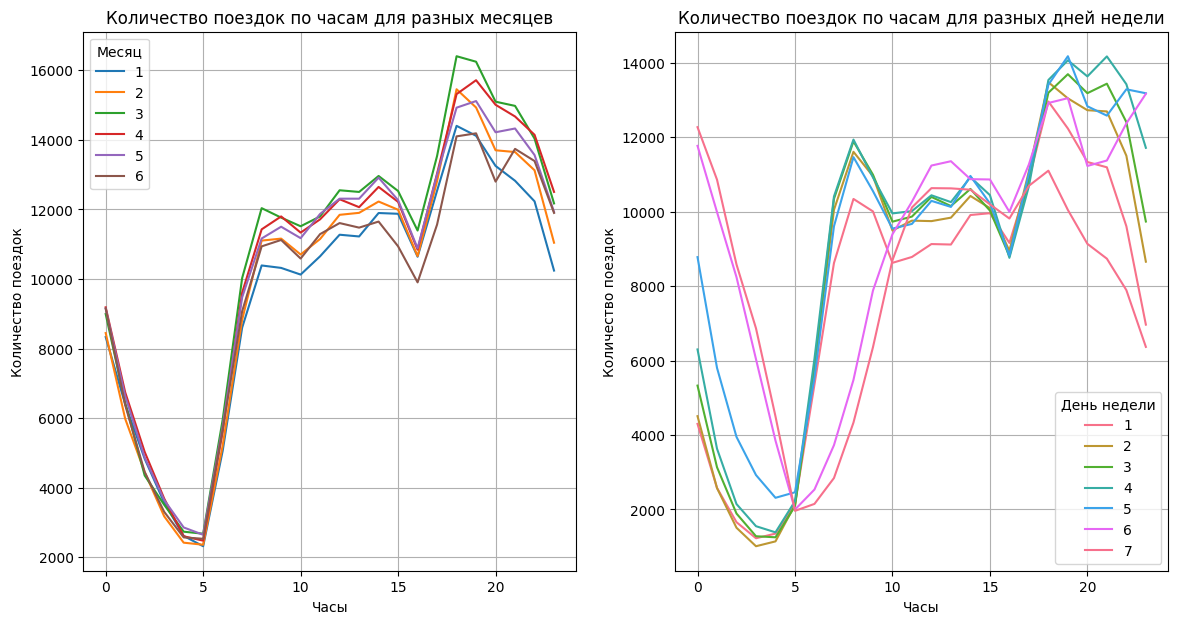

11909

In [1108]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df3 = df.with_columns([
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.month().alias("month"),
    pl.col("pickup_datetime").dt.weekday().alias("weekday")
])

hourly_by_month = df3.group_by(["hour", "month"]).count()
hourly_by_weekday = df3.group_by(["hour", "weekday"]).count()

plt.figure(figsize=(14, 7))

# График зависимости количества поездок от часа для разных месяцев
plt.subplot(1, 2, 1)
sns.lineplot(data=hourly_by_month.to_pandas(), x="hour", y="count", hue="month", palette="tab10")
plt.title("Количество поездок по часам для разных месяцев")
plt.xlabel("Часы")
plt.ylabel("Количество поездок")
plt.legend(title="Месяц", loc="upper left")
plt.grid(True)
# График зависимости количества поездок от часа для разных дней недели
plt.subplot(1, 2, 2)
sns.lineplot(data=hourly_by_weekday.to_pandas(), x="hour", y="count", hue="weekday", palette="husl")
plt.title("Количество поездок по часам для разных дней недели")
plt.xlabel("Часы")
plt.ylabel("Количество поездок")
plt.legend(title="День недели", loc="lower right")
plt.grid(True)
plt.show()
gc.collect()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

На графике справа явно выделяются выходные от будней, намного чаще вызывают такси ночью(возможно едут в клубы, к друзям и тд), в то время как утром наоборот реже. Так же явно можно заметить, что меньше всего такси вызывают в период с 4 до 5 утра(еще спят), а чаще всего ближе к 17-18 часа вечера(после работы). В марте больше всего пользуются такси(возможно из-за слякоти), в то время как в январе и июне меньше всего(хорошая погода)

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

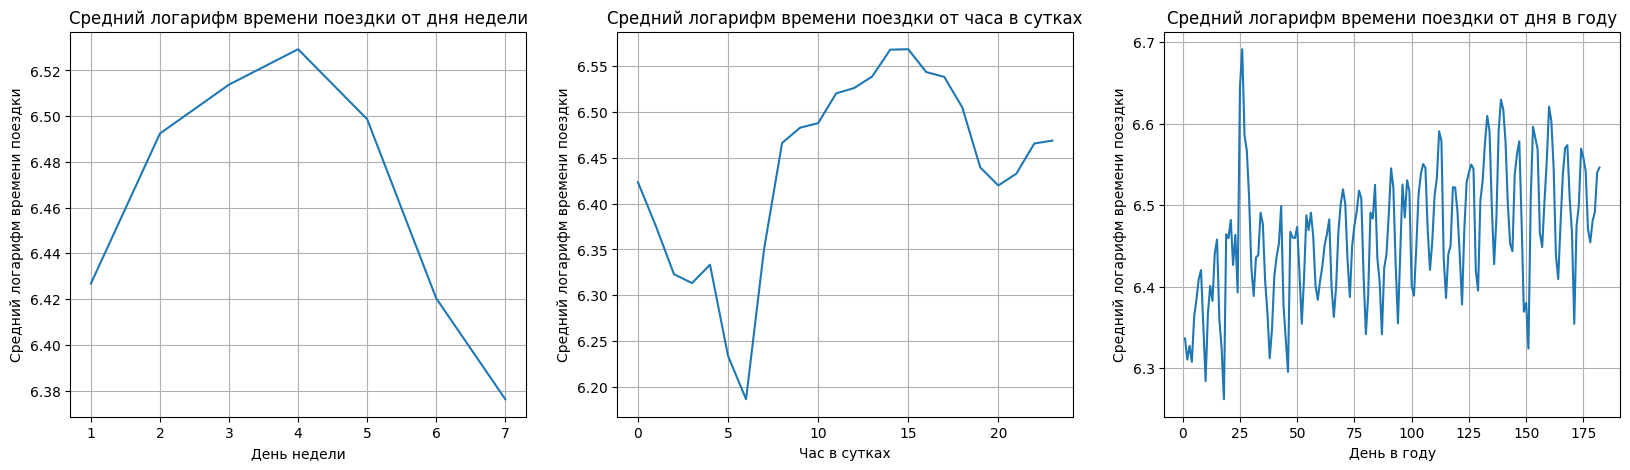

10537

In [1109]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.3, random_state=42) # делим на train и test

df4 = df_train.with_columns([
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.ordinal_day().alias("day"),
    pl.col("pickup_datetime").dt.weekday().alias("weekday")
])
avg_log_duration_weekday = df4.group_by("weekday").agg(pl.col("log_trip_duration").mean().alias("avg_log_trip_duration")).sort("weekday")
avg_log_duration_hour = df4.group_by("hour").agg(pl.col("log_trip_duration").mean().alias("avg_log_trip_duration")).sort("hour")
avg_log_duration_day_of_year = df4.group_by("day").agg(pl.col("log_trip_duration").mean().alias("avg_log_trip_duration")).sort("day")

plt.figure(figsize=(20, 5))

# График зависимости среднего логарифма времени поездки от дня недели
plt.subplot(1, 3, 1)
plt.plot(avg_log_duration_weekday["weekday"], avg_log_duration_weekday["avg_log_trip_duration"])
plt.xlabel("День недели")
plt.ylabel("Средний логарифм времени поездки")
plt.title("Средний логарифм времени поездки от дня недели")
plt.grid(True)
# График зависимости среднего логарифма времени поездки от часа в сутках
plt.subplot(1, 3, 2)
plt.plot(avg_log_duration_hour["hour"], avg_log_duration_hour["avg_log_trip_duration"])
plt.xlabel("Час в сутках")
plt.ylabel("Средний логарифм времени поездки")
plt.title("Средний логарифм времени поездки от часа в сутках")
plt.grid(True)
# График зависимости среднего логарифма времени поездки от дня в году
plt.subplot(1, 3, 3)
plt.plot(avg_log_duration_day_of_year["day"], avg_log_duration_day_of_year["avg_log_trip_duration"])
plt.xlabel("День в году")
plt.ylabel("Средний логарифм времени поездки")
plt.title("Средний логарифм времени поездки от дня в году")
plt.grid(True)
plt.show()
gc.collect()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

График зависимости таргета от часа в сутках похож на аналогичный график для количества поездок, но есть разница в час пик многие поездки короткие, что снижает среднее время.
Различия в графиках по дням недели могут объясняться тем, что в будни люди заказывают больше коротких поездок, а по выходным могут быть более длительные поездки.
На графике количества поездок есть скачки вниз в аномальные дни, которые, как мы выяснили, связаны с праздниками (например, День памяти и метель в январе).
График логарифма времени поездки по дням в году показывает аналогичные скачки, что и в графике количества поездок, что говорит о том, что в эти дни поездки были либо очень короткими, что связано с погодными условиями и праздниками.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [1110]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.with_columns([ # добавляем столбы дня, часа, месяца и лня недели
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.ordinal_day().alias("day"),
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.month().alias("month"),
])

df_train = df_train.with_columns([ # добавляем столбы дня, часа, месяца и лня недели
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.ordinal_day().alias("day"),
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.month().alias("month"),
])
df_test = df_test.with_columns([ # добавляем столбы дня, часа, месяца и лня недели
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.ordinal_day().alias("day"),
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.month().alias("month"),
])

df_test = df_test.with_columns([ # добавляем признак аномальных дней 
    (pl.col("day") == pl.date(2016, 5, 30).dt.ordinal_day()).alias("is_anomalous_memorial_day"), 
    ((pl.col("day") == pl.date(2016, 1, 23).dt.ordinal_day()) | (pl.col("day") == pl.date(2016, 1, 24).dt.ordinal_day())).alias("is_anomalous_blizzard") 
]) # на графике видно, что два дня попали под влияние снегопада

df = df.with_columns([ # добавляем признак аномальных дней 
    (pl.col("day") == pl.date(2016, 5, 30).dt.ordinal_day()).alias("is_anomalous_memorial_day"),
    ((pl.col("day") == pl.date(2016, 1, 23).dt.ordinal_day()) | (pl.col("day") == pl.date(2016, 1, 24).dt.ordinal_day())).alias("is_anomalous_blizzard")
]) # на графике видно, что два дня попали под влияние снегопада

df_train = df_train.with_columns([ # добавляем признак аномальных дней 
    (pl.col("day") == pl.date(2016, 5, 30).dt.ordinal_day()).alias("is_anomalous_memorial_day"),
    ((pl.col("day") == pl.date(2016, 1, 23).dt.ordinal_day()) | (pl.col("day") == pl.date(2016, 1, 24).dt.ordinal_day())).alias("is_anomalous_blizzard")
]) # на графике видно, что два дня попали под влияние снегопада

print(df_train)
gc.collect()

shape: (1_021_050, 16)
┌───────────┬───────────┬─────────────┬────────────┬───┬─────────┬───────┬────────────┬────────────┐
│ id        ┆ vendor_id ┆ pickup_date ┆ passenger_ ┆ … ┆ weekday ┆ month ┆ is_anomalo ┆ is_anomalo │
│ ---       ┆ ---       ┆ time        ┆ count      ┆   ┆ ---     ┆ ---   ┆ us_memoria ┆ us_blizzar │
│ str       ┆ i64       ┆ ---         ┆ ---        ┆   ┆ i8      ┆ i8    ┆ l_day      ┆ d          │
│           ┆           ┆ datetime[μs ┆ i64        ┆   ┆         ┆       ┆ ---        ┆ ---        │
│           ┆           ┆ ]           ┆            ┆   ┆         ┆       ┆ bool       ┆ bool       │
╞═══════════╪═══════════╪═════════════╪════════════╪═══╪═════════╪═══════╪════════════╪════════════╡
│ id2209155 ┆ 2         ┆ 2016-05-03  ┆ 2          ┆ … ┆ 2       ┆ 5     ┆ false      ┆ false      │
│           ┆           ┆ 09:03:08    ┆            ┆   ┆         ┆       ┆            ┆            │
│ id0586605 ┆ 1         ┆ 2016-01-01  ┆ 1          ┆ … ┆ 5       ┆ 1

0

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Категориальные признаки: день недели(тк не имеют количественной интерпретации, важно только будний день или выходной), месяц(тк не имеет числового порядка, который имел бы смысл для анализа), аномальность дня(тк бинарные переменные)
Численные признаки: логарифм длительности поездки, часы и номер дня

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [1111]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# создаем массивы признаков
features = ["weekday", "month", "is_anomalous_memorial_day", "is_anomalous_blizzard", "hour", "day"]
categorical = ["weekday", "month", "is_anomalous_memorial_day", "is_anomalous_blizzard"]
numeric_features = ["hour", "day"]
target = "log_trip_duration"

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(df_train.select(features).to_pandas(), df_train.select(pl.col("log_trip_duration")).to_pandas()) # обучаем
y_pred = model.predict(df_test.select(features).to_pandas()) # прогнозируем

results_df = pl.concat([pl.from_numpy(y_pred), df_test.select(pl.col("log_trip_duration"))], how = "horizontal") # создаем датафрейм для сравнения спрогнозированных данных с оригинальными
results_df = results_df.rename({results_df.columns[0]: "prediction", results_df.columns[1]: "true value"}) 

print(results_df)
print("Test RMSE = %.4f" % root_mean_squared_error(df_test.select(pl.col("log_trip_duration")), y_pred))
gc.collect()

shape: (437_594, 2)
┌────────────┬────────────┐
│ prediction ┆ true value │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 6.521184   ┆ 6.947937   │
│ 6.375095   ┆ 6.719013   │
│ 6.365766   ┆ 6.421622   │
│ 6.575379   ┆ 6.766192   │
│ 6.583543   ┆ 8.510773   │
│ …          ┆ …          │
│ 6.584185   ┆ 6.717805   │
│ 6.452379   ┆ 6.163315   │
│ 6.521325   ┆ 6.171701   │
│ 6.385207   ┆ 7.038784   │
│ 6.495424   ┆ 6.96885    │
└────────────┴────────────┘
Test RMSE = 0.7919


50

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [1112]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [1113]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
your_lat_values = df.sample(1000).select(pl.col("pickup_latitude")).to_numpy()
your_lon_values = df.sample(1000).select(pl.col("pickup_longitude")).to_numpy()

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Можно выделить аэропорт и торговый центр на набережной, тк туда часто заказывают такси 

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [1114]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2): # функция с семинара
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df = df.with_columns(pl.from_numpy(haversine_array(df['pickup_latitude'].to_numpy(), df['pickup_longitude'].to_numpy(), # добавляем столбец расстояния
                                                   df['dropoff_latitude'].to_numpy(), df['dropoff_longitude'].to_numpy())).rename({"column_0": "haversine"})) 
print(df)
gc.collect()

shape: (1_458_644, 17)
┌───────────┬───────────┬────────────┬────────────┬───┬───────┬────────────┬───────────┬───────────┐
│ id        ┆ vendor_id ┆ pickup_dat ┆ passenger_ ┆ … ┆ month ┆ is_anomalo ┆ is_anomal ┆ haversine │
│ ---       ┆ ---       ┆ etime      ┆ count      ┆   ┆ ---   ┆ us_memoria ┆ ous_blizz ┆ ---       │
│ str       ┆ i64       ┆ ---        ┆ ---        ┆   ┆ i8    ┆ l_day      ┆ ard       ┆ f64       │
│           ┆           ┆ datetime[μ ┆ i64        ┆   ┆       ┆ ---        ┆ ---       ┆           │
│           ┆           ┆ s]         ┆            ┆   ┆       ┆ bool       ┆ bool      ┆           │
╞═══════════╪═══════════╪════════════╪════════════╪═══╪═══════╪════════════╪═══════════╪═══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-14 ┆ 1          ┆ … ┆ 3     ┆ false      ┆ false     ┆ 1.498521  │
│           ┆           ┆ 17:24:55   ┆            ┆   ┆       ┆            ┆           ┆           │
│ id2377394 ┆ 1         ┆ 2016-06-12 ┆ 1          ┆ … ┆ 6     ┆ fals

0

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [1115]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.with_columns(pl.Series(np.log1p(df["haversine"].to_numpy())).alias("log_haversine")) # добавляем столбец логарифма расстояния
print(df)
gc.collect()

shape: (1_458_644, 18)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ passenger ┆ … ┆ is_anomal ┆ is_anomal ┆ haversine ┆ log_have │
│ ---       ┆ ---       ┆ tetime    ┆ _count    ┆   ┆ ous_memor ┆ ous_blizz ┆ ---       ┆ rsine    │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ ial_day   ┆ ard       ┆ f64       ┆ ---      │
│           ┆           ┆ datetime[ ┆ i64       ┆   ┆ ---       ┆ ---       ┆           ┆ f64      │
│           ┆           ┆ μs]       ┆           ┆   ┆ bool      ┆ bool      ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 1         ┆ … ┆ false     ┆ false     ┆ 1.498521  ┆ 0.915699 │
│           ┆           ┆ 4         ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ 17:24:55  ┆           ┆   ┆           ┆   

0

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [1116]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
correlation_haversine = df.select(pl.corr("haversine", "log_trip_duration")) # корреляция логарифма времени и расстояния
correlation_log_haversine = df.select(pl.corr("log_haversine", "log_trip_duration")) # корреляция логарифма времени и логарифма расстояния
correlation = pl.concat([correlation_haversine, correlation_log_haversine], how="horizontal") 
print(correlation)
gc.collect()

shape: (1, 2)
┌───────────┬───────────────┐
│ haversine ┆ log_haversine │
│ ---       ┆ ---           │
│ f64       ┆ f64           │
╞═══════════╪═══════════════╡
│ 0.573595  ┆ 0.749882      │
└───────────┴───────────────┘


0

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

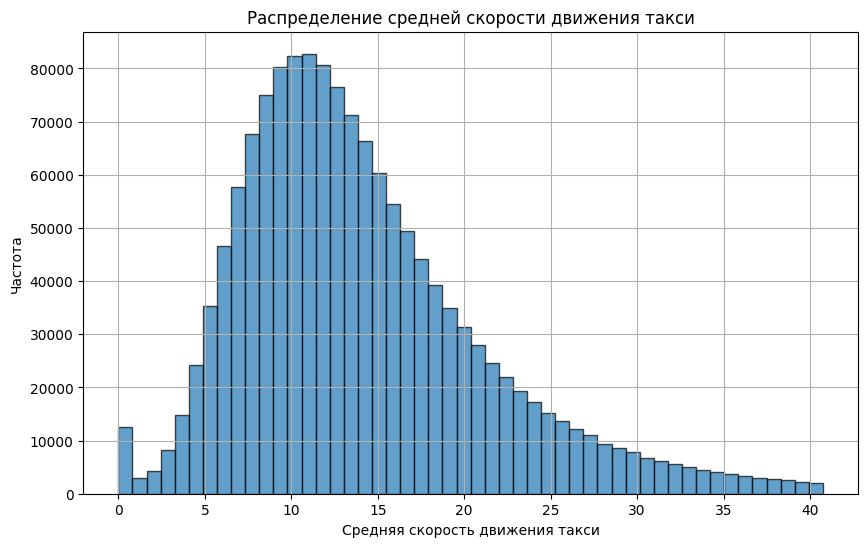

6879

In [1117]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.with_columns(pl.col("haversine").truediv((pl.col("log_trip_duration").exp() - 1)/ 3600).alias("mid_v")) # добавляем столбец средней скорости

# Удалим выбросы, оставив данные до 99-го процентиля
mid_v = df.select("mid_v").to_pandas()
limit_v = mid_v["mid_v"].quantile(0.99)
filtered_mid_v = mid_v[mid_v["mid_v"] <= limit_v]

plt.figure(figsize=(10, 6))
plt.hist(filtered_mid_v["mid_v"], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение средней скорости движения такси')
plt.xlabel('Средняя скорость движения такси')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
gc.collect()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

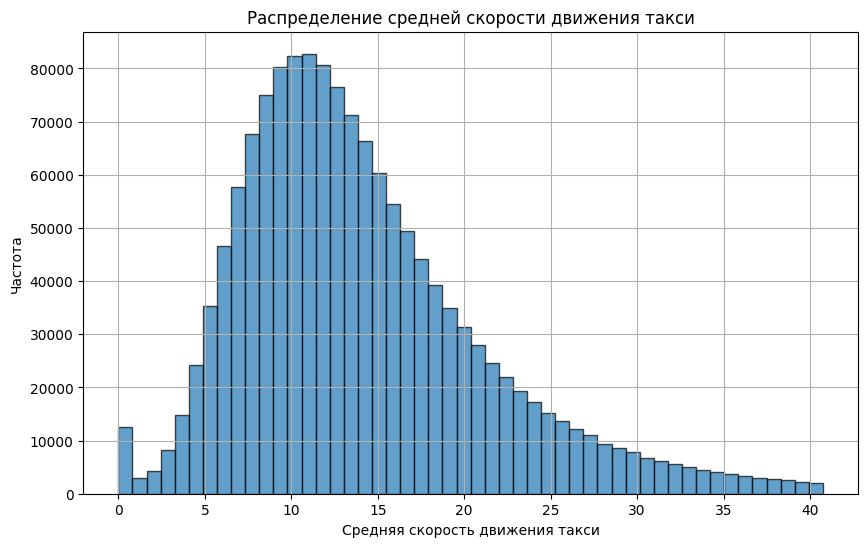

6879

In [1118]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ еще в прошлом пункте был использован квантиль 0.99, но можно понизиить до 0.95, но ничего не поменялось
limit_v2 = mid_v["mid_v"].quantile(0.95)
filtered_mid_v2 = mid_v[mid_v["mid_v"] <= limit_v]

plt.figure(figsize=(10, 6))
plt.hist(filtered_mid_v2["mid_v"], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение средней скорости движения такси')
plt.xlabel('Средняя скорость движения такси')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
gc.collect()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

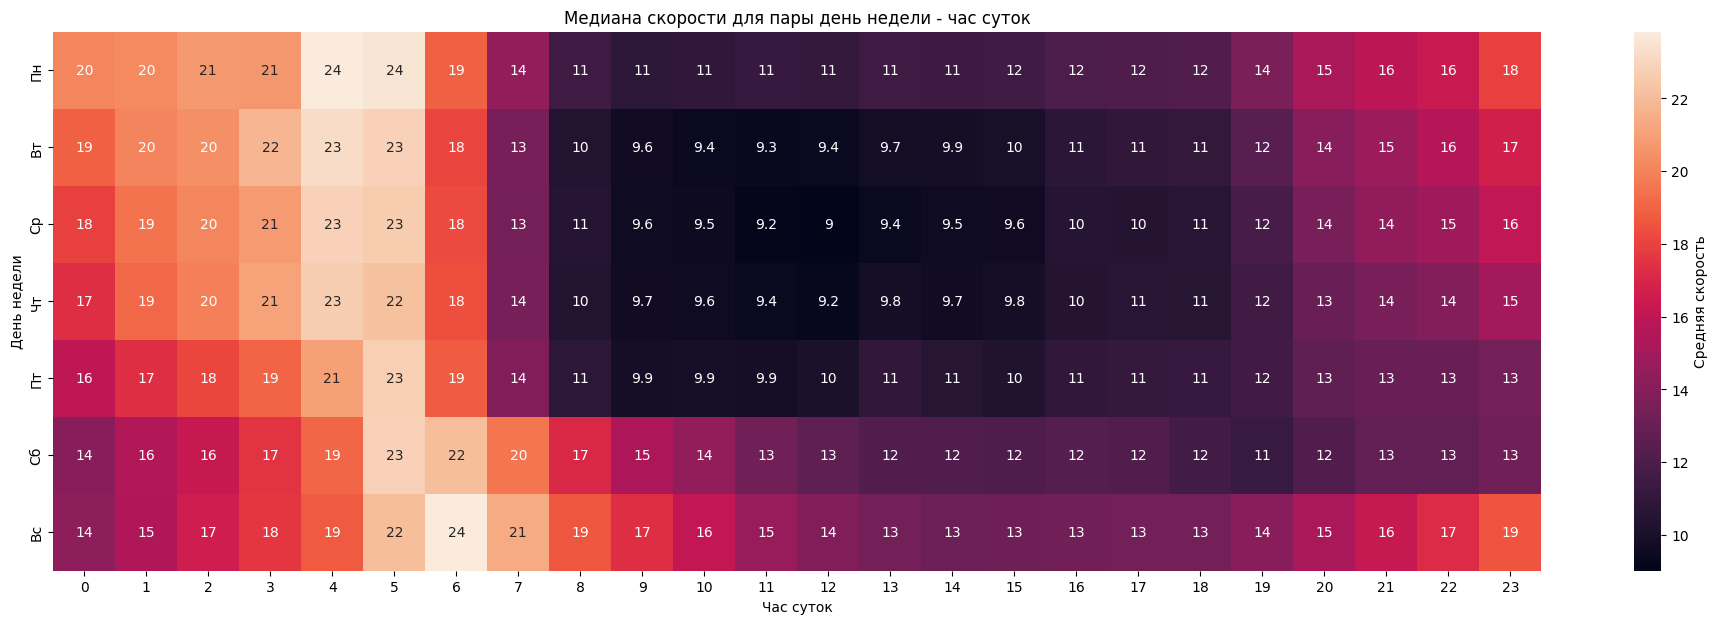

17881

In [1119]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
median_speeds = df.group_by(["weekday", "hour"]).agg(pl.col("mid_v").median().alias("median_v")).sort(["hour", "weekday"]) # вычисляем среднюю скорость для каждого часа каждого дня недели

heatmap_data = median_speeds.pivot(values="median_v", index="weekday", on="hour").to_pandas().iloc[:, 1:]  # подготавливаем данные для тепловой карты

plt.figure(figsize=(24, 7))
sns.heatmap(heatmap_data, cbar_kws={'label': 'Средняя скорость'}, annot = True, 
            yticklabels=["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"], xticklabels=[str(i) for i in range(24)])
plt.xlabel("Час суток")
plt.ylabel("День недели")
plt.title("Медиана скорости для пары день недели - час суток")
plt.show()
gc.collect()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Значение скорости нельзя использовать как признак при обучении модели, потому что целевая переменная времени поездки вычисляетмся через скорость, а это может привести к завышению качества модели на тренировочных данных, но к ухудшению на новых данных.

In [1120]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.drop("mid_v")

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

В будни скорость минимальна с 8 до 19, а максимальна с 0 до 6. 
В выходные минимальна с 13 до 20 и максимальна с 3 до 8

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [1121]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.with_columns([
    (((pl.col("weekday").is_in([0, 1, 2, 3, 4])) & (pl.col("hour").is_between(8, 19))) | 
     ((pl.col("weekday").is_in([5, 6])) & (pl.col("hour").is_between(13, 20)))).alias("is_rush_hour"), # добавляем колонку с условиями для загруженноц дороги
    (((pl.col("weekday").is_in([0, 1, 2, 3, 4])) & (pl.col("hour").is_between(0, 6))) | 
     ((pl.col("weekday").is_in([5, 6])) & (pl.col("hour").is_between(3, 8)))).alias("is_free_road") # добавляем колонку с условиями для свободной дороги
])

print(df.select(["pickup_datetime", "weekday", "hour", "is_rush_hour", "is_free_road"]))
gc.collect()

shape: (1_458_644, 5)
┌─────────────────────┬─────────┬──────┬──────────────┬──────────────┐
│ pickup_datetime     ┆ weekday ┆ hour ┆ is_rush_hour ┆ is_free_road │
│ ---                 ┆ ---     ┆ ---  ┆ ---          ┆ ---          │
│ datetime[μs]        ┆ i8      ┆ i8   ┆ bool         ┆ bool         │
╞═════════════════════╪═════════╪══════╪══════════════╪══════════════╡
│ 2016-03-14 17:24:55 ┆ 1       ┆ 17   ┆ true         ┆ false        │
│ 2016-06-12 00:43:35 ┆ 7       ┆ 0    ┆ false        ┆ false        │
│ 2016-01-19 11:35:24 ┆ 2       ┆ 11   ┆ true         ┆ false        │
│ 2016-04-06 19:32:31 ┆ 3       ┆ 19   ┆ true         ┆ false        │
│ 2016-03-26 13:30:55 ┆ 6       ┆ 13   ┆ true         ┆ false        │
│ …                   ┆ …       ┆ …    ┆ …            ┆ …            │
│ 2016-04-08 13:31:04 ┆ 5       ┆ 13   ┆ true         ┆ false        │
│ 2016-01-10 07:35:15 ┆ 7       ┆ 7    ┆ false        ┆ false        │
│ 2016-04-22 06:57:41 ┆ 5       ┆ 6    ┆ false        ┆

0

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [1122]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ аэропорт 40.8062° N, -73.9883° W     тц 40.7766° N, -73.8742° W      погрешность 2 км

df = df.with_columns([
    pl.Series("haversine_from_pickup_to_airport", haversine_array(df["pickup_latitude"].to_numpy(), 
                                                                  df["pickup_longitude"].to_numpy(), 
                                                                  np.full(df.height, 40.8062), 
                                                                  np.full(df.height, -73.9883)) <= 2),
    pl.Series("haversine_from_dropoff_to_airport", haversine_array(df["dropoff_latitude"].to_numpy(), 
                                                                   df["dropoff_longitude"].to_numpy(), 
                                                                   np.full(df.height, 40.8062), 
                                                                   np.full(df.height, -73.9883)) <= 2),
    pl.Series("haversine_from_pickup_to_shopping", haversine_array(df["pickup_latitude"].to_numpy(), 
                                                                  df["pickup_longitude"].to_numpy(), 
                                                                  np.full(df.height, 40.7766), 
                                                                  np.full(df.height, -73.8742)) <= 2),
    pl.Series("haversine_from_dropoff_to_shopping", haversine_array(df["dropoff_latitude"].to_numpy(), 
                                                                   df["dropoff_longitude"].to_numpy(), 
                                                                   np.full(df.height, 40.7766), 
                                                                   np.full(df.height, -73.8742)) <= 2),                                                               
])
print(df)
gc.collect()

shape: (1_458_644, 24)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ passenger ┆ … ┆ haversine ┆ haversine ┆ haversine ┆ haversin │
│ ---       ┆ ---       ┆ tetime    ┆ _count    ┆   ┆ _from_pic ┆ _from_dro ┆ _from_pic ┆ e_from_d │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ kup_to_ai ┆ poff_to_a ┆ kup_to_sh ┆ ropoff_t │
│           ┆           ┆ datetime[ ┆ i64       ┆   ┆ rpo…      ┆ irp…      ┆ opp…      ┆ o_shop…  │
│           ┆           ┆ μs]       ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ bool      ┆ bool      ┆ bool      ┆ bool     │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 1         ┆ … ┆ false     ┆ false     ┆ false     ┆ false    │
│           ┆           ┆ 4         ┆           ┆   ┆           ┆   

0

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

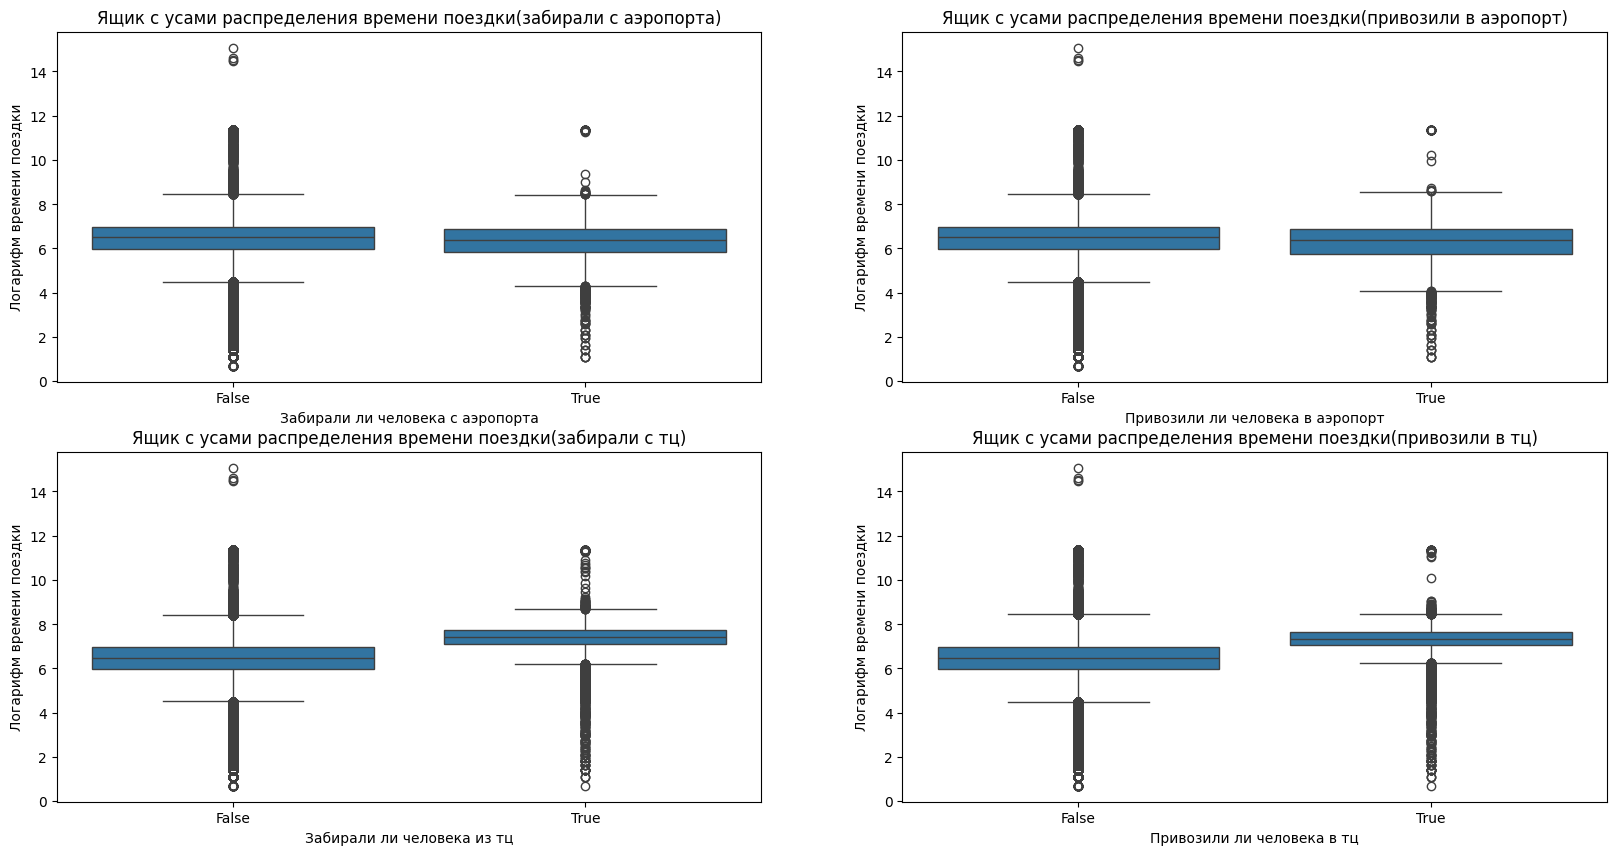

16201

In [1123]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_pandas = df.select([
    "haversine_from_pickup_to_airport",
    "haversine_from_dropoff_to_airport",
    "haversine_from_pickup_to_shopping",
    "haversine_from_dropoff_to_shopping",
    "log_trip_duration"
]).to_pandas()

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Boxplot для признака haversine_from_pickup_to_airport
sns.boxplot(ax=axes[0, 0], x=df_pandas["haversine_from_pickup_to_airport"], y=df_pandas["log_trip_duration"])
axes[0, 0].set_title("Ящик с усами распределения времени поездки(забирали с аэропорта)")
axes[0, 0].set_xlabel("Забирали ли человека с аэропорта")
axes[0, 0].set_ylabel("Логарифм времени поездки")

# Boxplot для признака haversine_from_dropoff_to_airport
sns.boxplot(ax=axes[0, 1], x=df_pandas["haversine_from_dropoff_to_airport"], y=df_pandas["log_trip_duration"])
axes[0, 1].set_title("Ящик с усами распределения времени поездки(привозили в аэропорт)")
axes[0, 1].set_xlabel("Привозили ли человека в аэропорт")
axes[0, 1].set_ylabel("Логарифм времени поездки")

# Boxplot для признака haversine_from_pickup_to_shopping
sns.boxplot(ax=axes[1, 0], x=df_pandas["haversine_from_pickup_to_shopping"], y=df_pandas["log_trip_duration"])
axes[1, 0].set_title("Ящик с усами распределения времени поездки(забирали с тц)")
axes[1, 0].set_xlabel("Забирали ли человека из тц")
axes[1, 0].set_ylabel("Логарифм времени поездки")

# Boxplot для признака haversine_from_dropoff_to_shopping
sns.boxplot(ax=axes[1, 1], x=df_pandas["haversine_from_dropoff_to_shopping"], y=df_pandas["log_trip_duration"])
axes[1, 1].set_title("Ящик с усами распределения времени поездки(привозили в тц)")
axes[1, 1].set_xlabel("Привозили ли человека в тц")
axes[1, 1].set_ylabel("Логарифм времени поездки")

plt.show()
gc.collect()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Т.к. медианы очень близки друг к другу => данные признаки могут нести мало полезной информации для прогнозирования целевого признака

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [1124]:
from sklearn.base import BaseEstimator, TransformerMixin

# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def show_map(self):
        # cоздаем карту с необходимой локацией
        m = folium.Map(location=[(self.lat_min + self.lat_max) / 2, (self.lon_min + self.lon_max) / 2], zoom_start=12)
        for row in range(4):
            for col in range(3):
                # находим границы ячейки
                lat_start = self.lat_min + row * self.lat_step 
                lat_end = lat_start + self.lat_step
                lon_start = self.lon_min + col * self.lon_step
                lon_end = lon_start + self.lon_step
                # рисуем прямоугольник
                folium.Rectangle(
                    bounds=[[lat_start, lon_start], [lat_end, lon_end]],
                    color="red",
                    weight=5
                ).add_to(m)
        return m
        
    def fit(self, X=None, y=None):
        # создаем общий список ширины и долготы
        self.latitude = pl.concat([X.select(pl.col("pickup_latitude").alias("latitude")), X.select(pl.col("dropoff_latitude").alias("latitude"))])
        self.longitude= pl.concat([X.select(pl.col("pickup_longitude").alias("longitude")), X.select(pl.col("dropoff_longitude").alias("longitude"))])
        # определяем с помощью квантилей границы основной массы координат
        self.lat_min = np.quantile(self.latitude, 0.05)
        self.lat_max = np.quantile(self.latitude, 0.95)
        self.lon_min = np.quantile(self.longitude, 0.05)
        self.lon_max = np.quantile(self.longitude, 0.95)
        # определеяем высоту и ширину ячеек
        self.lat_step = (self.lat_max - self.lat_min) / 4
        self.lon_step = (self.lon_max - self.lon_min) / 3
        return self
    

    def transform(self, X, y=None):
        X_new = X.with_columns(self._cell_number(X["pickup_latitude"], X["pickup_longitude"]).alias("pickup_cell"), 
                               self._cell_number(X["dropoff_latitude"], X["dropoff_longitude"]).alias("dropoff_cell"))
        return X_new

    def _cell_number(self, latitudes, longitudes):
        # вычисляем номер строки и столбца для каждой координаты
        row_numb = ((latitudes - self.lat_min) / self.lat_step).ceil().cast(pl.Int64).alias("values_row")
        col_numb = ((longitudes - self.lon_min) / self.lon_step).ceil().cast(pl.Int64).alias("values_col")
        # присваиваем -1 для координат вне сетки
        row_numb= pl.when((row_numb >= 0) & (row_numb < 4)).then(row_numb).otherwise(-1)
        col_numb = pl.when((col_numb >= 0) & (col_numb < 3)).then(col_numb).otherwise(-1)
        # вычисляем общий номер ячейки или -1
        cell_numbers = pl.when((row_numb != -1) & (col_numb != -1)).then(row_numb * 3 + col_numb).otherwise(1)
        return cell_numbers


transformer = MapGridTransformer()
transformer.fit(df)
map_with_grid = transformer.show_map()
df = transformer.transform(df)
print(df)
map_with_grid

shape: (1_458_644, 26)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ passenger ┆ … ┆ haversine ┆ haversine ┆ pickup_ce ┆ dropoff_ │
│ ---       ┆ ---       ┆ tetime    ┆ _count    ┆   ┆ _from_pic ┆ _from_dro ┆ ll        ┆ cell     │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ kup_to_sh ┆ poff_to_s ┆ ---       ┆ ---      │
│           ┆           ┆ datetime[ ┆ i64       ┆   ┆ opp…      ┆ hop…      ┆ i64       ┆ i64      │
│           ┆           ┆ μs]       ┆           ┆   ┆ ---       ┆ ---       ┆           ┆          │
│           ┆           ┆           ┆           ┆   ┆ bool      ┆ bool      ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 1         ┆ … ┆ false     ┆ false     ┆ 10        ┆ 11       │
│           ┆           ┆ 4         ┆           ┆   ┆           ┆   

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [1125]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import root_mean_squared_error

df_train10, df_test10 = sklearn.model_selection.train_test_split(df, test_size=0.3, random_state=42)
# добавляем новые признаки
features10 = ["weekday", "month", "is_anomalous_memorial_day", "is_anomalous_blizzard", "hour", "day", "is_rush_hour", "is_free_road",
             "log_haversine", "pickup_cell", "dropoff_cell", "haversine_from_pickup_to_airport", "haversine_from_dropoff_to_airport",
               "haversine_from_pickup_to_shopping", "haversine_from_dropoff_to_shopping"]
categorical = ["weekday", "month", "is_anomalous_memorial_day", "is_anomalous_blizzard", "is_rush_hour", "is_free_road",
               "haversine_from_pickup_to_airport", "haversine_from_dropoff_to_airport",
               "haversine_from_pickup_to_shopping", "haversine_from_dropoff_to_shopping", "pickup_cell", "dropoff_cell"]
numeric_features = ["hour", "day", "log_haversine"]
target = "log_trip_duration"

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model10 = pipeline.fit(df_train10.select(features10).to_pandas(), df_train10.select(pl.col("log_trip_duration")).to_pandas()) # обучаем
y_pred = model10.predict(df_test10.select(features10).to_pandas()) # делаем прогноз

results_df = pl.concat([pl.from_numpy(y_pred), df_test10.select(pl.col("log_trip_duration"))], how = "horizontal")
results_df = results_df.rename({results_df.columns[0]: "prediction", results_df.columns[1]: "true value"})

print(results_df)
print("Test RMSE = %.4f" % root_mean_squared_error(df_test10.select(pl.col("log_trip_duration")), y_pred))
gc.collect()

shape: (437_594, 2)
┌────────────┬────────────┐
│ prediction ┆ true value │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 6.697614   ┆ 6.947937   │
│ 6.355205   ┆ 6.719013   │
│ 6.026558   ┆ 6.421622   │
│ 6.666243   ┆ 6.766192   │
│ 8.650126   ┆ 8.510773   │
│ …          ┆ …          │
│ 6.504824   ┆ 6.717805   │
│ 5.995066   ┆ 6.163315   │
│ 5.96868    ┆ 6.171701   │
│ 6.825005   ┆ 7.038784   │
│ 6.631291   ┆ 6.96885    │
└────────────┴────────────┘
Test RMSE = 0.4853


65

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

vendor_id может буть полезен, потому что у каждого водителя свой стиль вождения и от этого может зависеть итоговая длительность поездки. Если пассажиров больше одного, то есть вероятность, что людей нужно развозить по нескольким точкам, что тоже увеличит длительность поездки. store_and_fwd_flag показывает происходит ли поездка в местах с плохим качеством связи, что в некоторых случаях может сигнализировать об отклонениях в движении и как следствие увеличение длительности поездки

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [1126]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("Кол-во уникальных значений vendor_id:", df.select(pl.col("vendor_id").n_unique()).item())
print("Кол-во уникальных значений passenger_count:", df.select(pl.col("passenger_count").n_unique()).item())
print("Кол-во уникальных значений store_and_fwd_flag:", df.select(pl.col("store_and_fwd_flag").n_unique()).item())

Кол-во уникальных значений vendor_id: 2
Кол-во уникальных значений passenger_count: 10
Кол-во уникальных значений store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

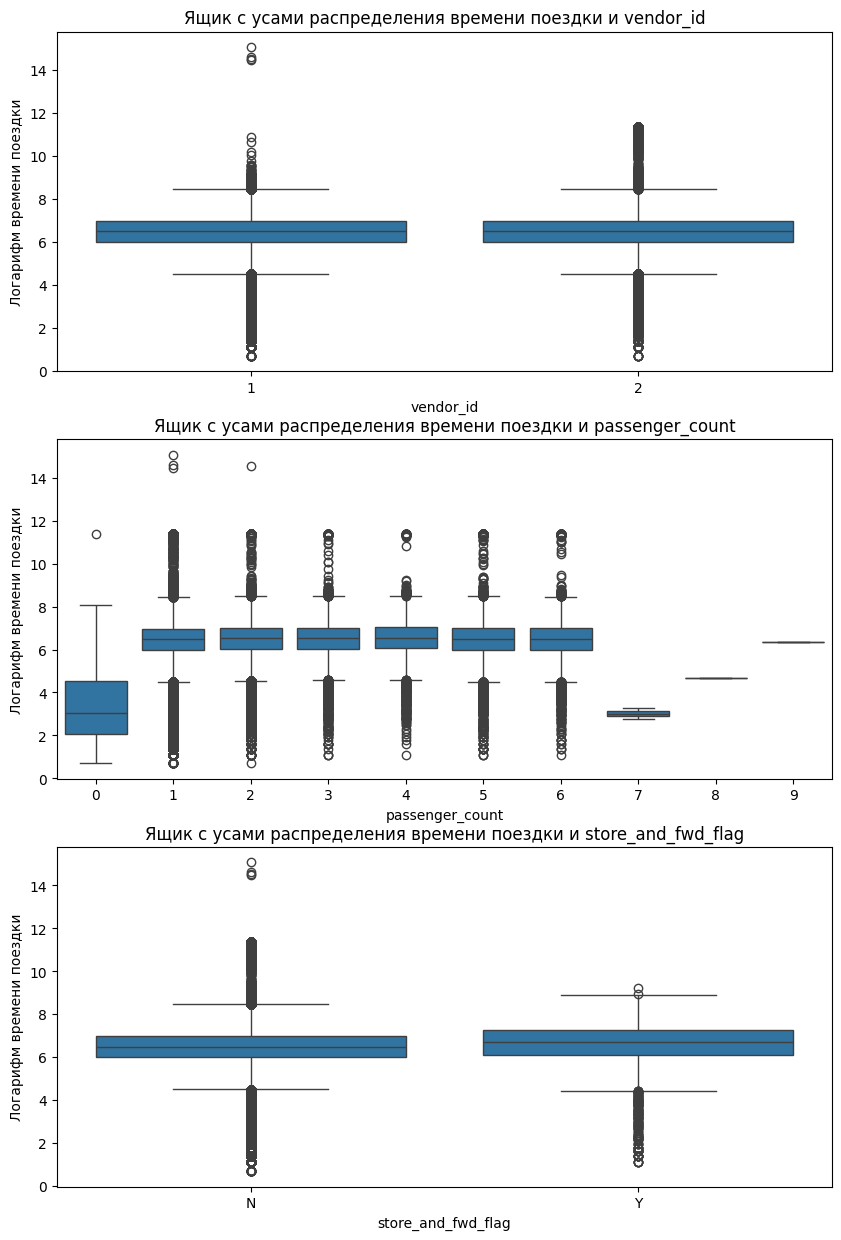

15287

In [1127]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_pandas = df.select([
    "vendor_id",
    "passenger_count",
    "store_and_fwd_flag",
    "log_trip_duration"
]).to_pandas() # выбираем необходимые признаки 

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# ящик с усами для признака vendor_id
sns.boxplot(ax=axes[0], x=df_pandas["vendor_id"], y=df_pandas["log_trip_duration"])
axes[0].set_title("Ящик с усами распределения времени поездки и vendor_id")
axes[0].set_xlabel("vendor_id")
axes[0].set_ylabel("Логарифм времени поездки")

# ящик с усами для признака passenger_count
sns.boxplot(ax=axes[1], x=df_pandas["passenger_count"], y=df_pandas["log_trip_duration"])
axes[1].set_title("Ящик с усами распределения времени поездки и passenger_count")
axes[1].set_xlabel("passenger_count")
axes[1].set_ylabel("Логарифм времени поездки")

# ящик с усами для признака haversine_from_pickup_to_shopping
sns.boxplot(ax=axes[2], x=df_pandas["store_and_fwd_flag"], y=df_pandas["log_trip_duration"])
axes[2].set_title("Ящик с усами распределения времени поездки и store_and_fwd_flag")
axes[2].set_xlabel("store_and_fwd_flag")
axes[2].set_ylabel("Логарифм времени поездки")

plt.show()
gc.collect()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [1128]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.with_columns([(pl.col("vendor_id") - 1), pl.when(pl.col("store_and_fwd_flag") == 'Y').then(1).otherwise(0).alias("store_and_fwd_flag")]) 
print(df)

shape: (1_458_644, 26)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ passenger ┆ … ┆ haversine ┆ haversine ┆ pickup_ce ┆ dropoff_ │
│ ---       ┆ ---       ┆ tetime    ┆ _count    ┆   ┆ _from_pic ┆ _from_dro ┆ ll        ┆ cell     │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ kup_to_sh ┆ poff_to_s ┆ ---       ┆ ---      │
│           ┆           ┆ datetime[ ┆ i64       ┆   ┆ opp…      ┆ hop…      ┆ i64       ┆ i64      │
│           ┆           ┆ μs]       ┆           ┆   ┆ ---       ┆ ---       ┆           ┆          │
│           ┆           ┆           ┆           ┆   ┆ bool      ┆ bool      ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 1         ┆ 2016-03-1 ┆ 1         ┆ … ┆ false     ┆ false     ┆ 10        ┆ 11       │
│           ┆           ┆ 4         ┆           ┆   ┆           ┆   

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

График показывает, что различия во времени поездки между двумя значениями vendor_id незначительны, а значит признак слабый

Время поездки почти не зависит от числа пассажиров, особенно для значений от 1 до 6 и только для значений 0, 7 и 9 можно заметить заметное отклонение в распределениях, но такие значения встречаются редко, а значит признак passenger_count может оказаться полезным, но в ограниченной степени

Распределение времени поездки между значениями 'Y' и 'N' для признака store_and_fwd_flag тоже почти одинаково, а значит и признак не окажется сильным для модели

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [1129]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train12, df_test12 = sklearn.model_selection.train_test_split(df, test_size=0.3, random_state=42)
# добавляем новые данные, все остальное то же самое
features = ["weekday", "month", "is_anomalous_memorial_day", "is_anomalous_blizzard", "hour", "day", "is_rush_hour", "is_free_road","log_haversine", "pickup_cell", 
            "dropoff_cell", "haversine_from_pickup_to_airport", "haversine_from_dropoff_to_airport", "haversine_from_pickup_to_shopping",
            "haversine_from_dropoff_to_shopping", "vendor_id", "passenger_count", "store_and_fwd_flag"]
categorical = ["weekday", "month", "is_anomalous_memorial_day", "is_anomalous_blizzard", "is_rush_hour", "is_free_road","haversine_from_pickup_to_airport", 
               "haversine_from_dropoff_to_airport", "haversine_from_pickup_to_shopping", "haversine_from_dropoff_to_shopping", "vendor_id", "store_and_fwd_flag", "pickup_cell", "dropoff_cell"]
numeric_features = ["hour", "day", "log_haversine", "passenger_count"]
target = "log_trip_duration"

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(df_train12.select(features).to_pandas(), df_train12.select(pl.col("log_trip_duration")).to_pandas())
y_pred = model.predict(df_test12.select(features).to_pandas())

results_df = pl.concat([pl.from_numpy(y_pred), df_test12.select(pl.col("log_trip_duration"))], how = "horizontal")
results_df = results_df.rename({results_df.columns[0]: "prediction", results_df.columns[1]: "true value"})

print(results_df)
print("Test RMSE = %.4f" % root_mean_squared_error(df_test12.select(pl.col("log_trip_duration")), y_pred))
gc.collect()

shape: (437_594, 2)
┌────────────┬────────────┐
│ prediction ┆ true value │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 6.703275   ┆ 6.947937   │
│ 6.360457   ┆ 6.719013   │
│ 6.053945   ┆ 6.421622   │
│ 6.677467   ┆ 6.766192   │
│ 8.652469   ┆ 8.510773   │
│ …          ┆ …          │
│ 6.496729   ┆ 6.717805   │
│ 5.980846   ┆ 6.163315   │
│ 5.996902   ┆ 6.171701   │
│ 6.816086   ┆ 7.038784   │
│ 6.636886   ┆ 6.96885    │
└────────────┴────────────┘
Test RMSE = 0.4851


50

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [1130]:
# признаки не дали ощутимого улучшения
df = df.drop(["vendor_id", "passenger_count", "store_and_fwd_flag"])
df_train12 = df_train12.drop(["vendor_id", "passenger_count", "store_and_fwd_flag"])
df_test12 = df_test12.drop(["vendor_id", "passenger_count", "store_and_fwd_flag"])
print(df)

shape: (1_458_644, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ pickup_da ┆ pickup_lo ┆ pickup_la ┆ … ┆ haversine ┆ haversine ┆ pickup_ce ┆ dropoff_ │
│ ---       ┆ tetime    ┆ ngitude   ┆ titude    ┆   ┆ _from_pic ┆ _from_dro ┆ ll        ┆ cell     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ kup_to_sh ┆ poff_to_s ┆ ---       ┆ ---      │
│           ┆ datetime[ ┆ f64       ┆ f64       ┆   ┆ opp…      ┆ hop…      ┆ i64       ┆ i64      │
│           ┆ μs]       ┆           ┆           ┆   ┆ ---       ┆ ---       ┆           ┆          │
│           ┆           ┆           ┆           ┆   ┆ bool      ┆ bool      ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2016-03-1 ┆ -73.98215 ┆ 40.767937 ┆ … ┆ false     ┆ false     ┆ 10        ┆ 11       │
│           ┆ 4         ┆ 5         ┆           ┆   ┆           ┆   

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

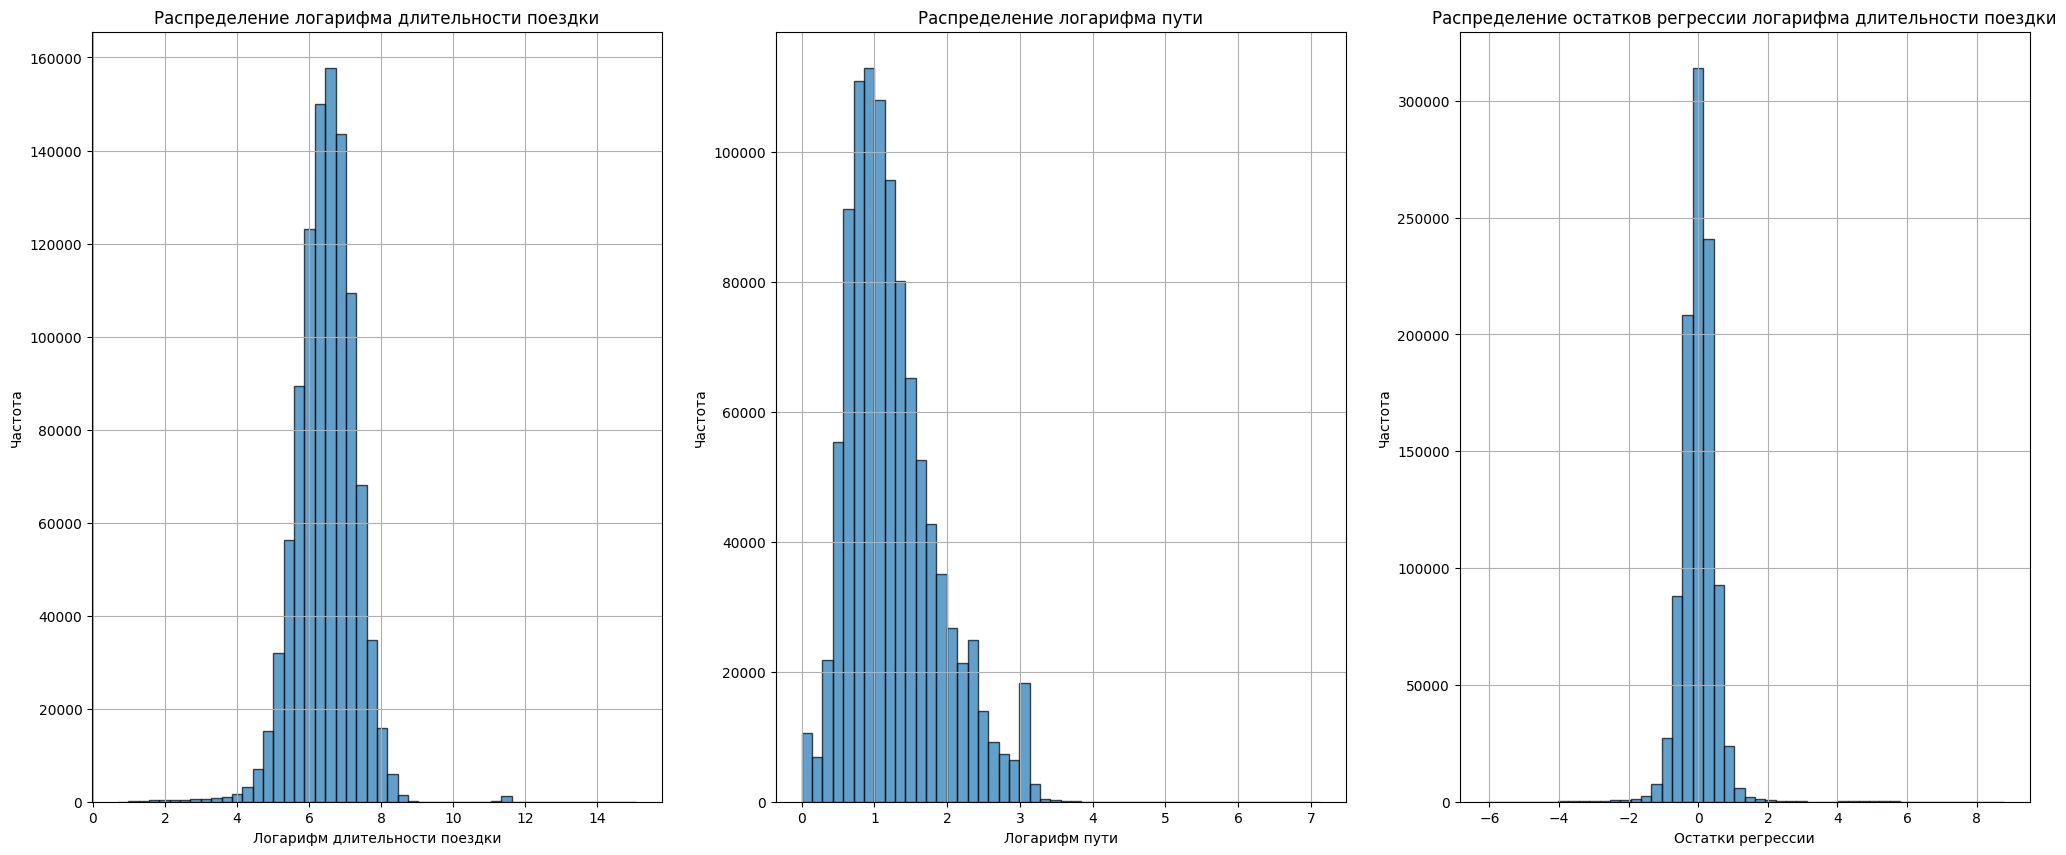

shape: (986_260, 3)
┌───────────────────┬───────────┬───────────────┐
│ log_trip_duration ┆ residuals ┆ log_haversine │
│ ---               ┆ ---       ┆ ---           │
│ f64               ┆ f64       ┆ f64           │
╞═══════════════════╪═══════════╪═══════════════╡
│ 6.739337          ┆ 0.345911  ┆ 0.816774      │
│ 6.909753          ┆ -0.131711 ┆ 1.758549      │
│ 6.955593          ┆ -0.002826 ┆ 2.136659      │
│ 6.665684          ┆ 0.020561  ┆ 1.49175       │
│ 6.597146          ┆ 0.105973  ┆ 1.247338      │
│ …                 ┆ …         ┆ …             │
│ 7.156177          ┆ 0.286091  ┆ 1.842196      │
│ 6.726233          ┆ 0.237844  ┆ 1.023809      │
│ 7.159292          ┆ -0.217238 ┆ 2.129142      │
│ 5.966147          ┆ 0.089982  ┆ 0.496046      │
│ 7.359468          ┆ -0.156459 ┆ 2.511655      │
└───────────────────┴───────────┴───────────────┘


19295

In [1131]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
duration = df_train12.with_columns(pl.col("log_trip_duration")).to_pandas()
# Распределение логарифма длительности поездки
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.hist(duration["log_trip_duration"], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение логарифма длительности поездки')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Частота')
plt.grid(True)

distance = df_train12.with_columns(pl.col("log_haversine")).to_pandas()
#Распределение логарифма пути
plt.subplot(1, 3, 2)
plt.hist(distance["log_haversine"], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение логарифма пути')
plt.xlabel('Логарифм пути')
plt.ylabel('Частота')
plt.grid(True)

# Вычисляем остатки регрессии
features10 = ["weekday", "month", "is_anomalous_memorial_day", "is_anomalous_blizzard", "hour", "day", "is_rush_hour", "is_free_road",
             "log_haversine", "pickup_cell", "dropoff_cell", "haversine_from_pickup_to_airport", "haversine_from_dropoff_to_airport",
               "haversine_from_pickup_to_shopping", "haversine_from_dropoff_to_shopping"]
categorical = ["weekday", "month", "is_anomalous_memorial_day", "is_anomalous_blizzard", "is_rush_hour", "is_free_road",
               "haversine_from_pickup_to_airport", "haversine_from_dropoff_to_airport",
               "haversine_from_pickup_to_shopping", "haversine_from_dropoff_to_shopping", "pickup_cell", "dropoff_cell"]
numeric_features = ["hour", "day", "log_haversine"]
target = "log_trip_duration"

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
# Распределение остатков регрессии логарифма длительности поездки
model13 = pipeline.fit(df_train12.select(features10).to_pandas(), df_train12.select(pl.col("log_trip_duration")).to_pandas())
residuals = df_train12.select(pl.col("log_trip_duration")) - pl.from_numpy(model13.predict(df_train12.select(features10).to_pandas()))
plt.subplot(1, 3, 3)
plt.hist(residuals["log_trip_duration"], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение остатков регрессии логарифма длительности поездки')
plt.xlabel('Остатки регрессии')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

# Чистим обучающую выборку
df_train13 = df_train12.with_columns(residuals["log_trip_duration"].alias("residuals"))
df_train13 = df_train13.filter((df_train13["log_trip_duration"] >= df_train13["log_trip_duration"].quantile(0.01)) & 
                                     (df_train13["log_haversine"] <= df_train13["log_haversine"].quantile(0.99)) & 
                                     (df_train13["residuals"].abs() <= df_train13["residuals"].quantile(0.99)))
print(df_train13.select("log_trip_duration", "residuals", "log_haversine"))
gc.collect()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [1132]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ можно объединить "is_anomalous_memorial_day" и "is_anomalous_blizzard" в "is_anomalous", а так же "haversine_from_pickup_to_airport" и 
# "haversine_from_dropoff_to_airport" в "haversine_to_airport" и аналогично с "haversine_to_shopping"
df_train13 = df_train13.with_columns(
    (pl.col("is_anomalous_memorial_day") | pl.col("is_anomalous_blizzard")).alias("is_anomalous"), 
    (pl.col("haversine_from_pickup_to_airport") | pl.col("haversine_from_dropoff_to_airport")).alias("haversine_to_airport"),
    (pl.col("haversine_from_pickup_to_shopping") | pl.col("haversine_from_pickup_to_shopping")).alias("haversine_to_shopping")
).drop(["is_anomalous_memorial_day", "is_anomalous_blizzard", "haversine_from_pickup_to_airport", "haversine_from_pickup_to_shopping",
        "haversine_from_dropoff_to_airport", "haversine_from_pickup_to_shopping"])
df_test13 = df_test10.with_columns(
    (pl.col("is_anomalous_memorial_day") | pl.col("is_anomalous_blizzard")).alias("is_anomalous"), 
    (pl.col("haversine_from_pickup_to_airport") | pl.col("haversine_from_dropoff_to_airport")).alias("haversine_to_airport"),
    (pl.col("haversine_from_pickup_to_shopping") | pl.col("haversine_from_pickup_to_shopping")).alias("haversine_to_shopping")
).drop(["is_anomalous_memorial_day", "is_anomalous_blizzard", "haversine_from_pickup_to_airport", "haversine_from_pickup_to_shopping",
        "haversine_from_dropoff_to_airport", "haversine_from_pickup_to_shopping"])
print(df_train13)

shape: (986_260, 22)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ pickup_da ┆ pickup_lo ┆ pickup_la ┆ … ┆ residuals ┆ is_anomal ┆ haversine ┆ haversin │
│ ---       ┆ tetime    ┆ ngitude   ┆ titude    ┆   ┆ ---       ┆ ous       ┆ _to_airpo ┆ e_to_sho │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ f64       ┆ ---       ┆ rt        ┆ pping    │
│           ┆ datetime[ ┆ f64       ┆ f64       ┆   ┆           ┆ bool      ┆ ---       ┆ ---      │
│           ┆ μs]       ┆           ┆           ┆   ┆           ┆           ┆ bool      ┆ bool     │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2209155 ┆ 2016-05-0 ┆ -73.97981 ┆ 40.752529 ┆ … ┆ 0.345911  ┆ false     ┆ false     ┆ false    │
│           ┆ 3         ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆ 09:03:08  ┆           ┆           ┆   ┆           ┆     

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [1133]:
# удаляем ненужные признаки и добаввляем нужные, все остально так же
features13 = ["weekday", "month", "is_anomalous", "hour", "day", "is_rush_hour", "is_free_road",
             "log_haversine", "pickup_cell", "dropoff_cell", "haversine_to_airport", "haversine_to_shopping"]
categorical13 = ["weekday", "month", "is_anomalous", "is_rush_hour", "is_free_road", "haversine_to_airport", "haversine_to_shopping","pickup_cell", "dropoff_cell" ]
numeric_features = ["hour", "day", "log_haversine"]
target = "log_trip_duration"

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical13),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model13 = pipeline.fit(df_train13.select(features13).to_pandas(), df_train13.select(pl.col("log_trip_duration")).to_pandas())
y_pred = model13.predict(df_test13.select(features13).to_pandas())

results_df = pl.concat([pl.from_numpy(y_pred), df_test13.select(pl.col("log_trip_duration"))], how = "horizontal")
results_df = results_df.rename({results_df.columns[0]: "prediction", results_df.columns[1]: "true value"})

print(results_df)
print("Test RMSE = %.4f" % root_mean_squared_error(df_test13.select(pl.col("log_trip_duration")), y_pred))
gc.collect()

shape: (437_594, 2)
┌────────────┬────────────┐
│ prediction ┆ true value │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 6.699394   ┆ 6.947937   │
│ 6.368519   ┆ 6.719013   │
│ 6.03063    ┆ 6.421622   │
│ 6.672838   ┆ 6.766192   │
│ 8.641427   ┆ 8.510773   │
│ …          ┆ …          │
│ 6.509725   ┆ 6.717805   │
│ 5.978665   ┆ 6.163315   │
│ 5.970935   ┆ 6.171701   │
│ 6.823185   ┆ 7.038784   │
│ 6.634756   ┆ 6.96885    │
└────────────┴────────────┘
Test RMSE = 0.4859


50

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [1134]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
num_features_before = len(features13)
print(f"Количество признаков до кодирования: {num_features_before}")

transformed = column_transformer.fit_transform(df_train13.select(features13).to_pandas())

num_features_after = transformed.shape[1]
print(f"Количество признаков после кодирования: {num_features_after}")

Количество признаков до кодирования: 12
Количество признаков после кодирования: 50


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [1135]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(df_train13.select(features13).to_pandas(), df_train13.select(pl.col("log_trip_duration")).to_pandas()) # строим Lasso регрессию
y_pred = model.predict(df_test13.select(features13).to_pandas()) # предсказываем
results_df = pl.concat([pl.from_numpy(y_pred), df_test13.select(pl.col("log_trip_duration"))], how = "horizontal") # объединяем в одну таблицу предсказанные и оригинальные значения
results_df = results_df.rename({results_df.columns[0]: "prediction", results_df.columns[1]: "true value"})

print(results_df)
print("Test RMSE = %.4f" % root_mean_squared_error(df_test13.select(pl.col("log_trip_duration")), y_pred))

shape: (437_594, 2)
┌────────────┬────────────┐
│ prediction ┆ true value │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 6.474516   ┆ 6.947937   │
│ 6.474516   ┆ 6.719013   │
│ 6.474516   ┆ 6.421622   │
│ 6.474516   ┆ 6.766192   │
│ 6.474516   ┆ 8.510773   │
│ …          ┆ …          │
│ 6.474516   ┆ 6.717805   │
│ 6.474516   ┆ 6.163315   │
│ 6.474516   ┆ 6.171701   │
│ 6.474516   ┆ 7.038784   │
│ 6.474516   ┆ 6.96885    │
└────────────┴────────────┘
Test RMSE = 0.7951


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [1136]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(df_train13.select(features13).to_pandas(), 
                                                                          df_train13.select(pl.col("log_trip_duration")).to_pandas(), test_size=0.2, random_state=42)
alphas = np.logspace(-2, 4, 20)

# подбор параметра alpha для Lasso
lasso_searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
lasso_searcher.fit(X_train, y_train)
best_lasso_alpha = lasso_searcher.best_params_["regression__alpha"]
print("Лучшее alpha для Lasso =", best_lasso_alpha)

# подбор параметра alpha для Ridge
ridge_searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
ridge_searcher.fit(X_train, y_train)
best_ridge_alpha = ridge_searcher.best_params_["regression__alpha"]
print("Лучшее alpha для Ridge =", best_ridge_alpha)

# оценка качества на тестовой выборке с использованием лучшей модели
if ridge_searcher.best_score_ > lasso_searcher.best_score_:
    print("Ridge лучше")
    best_model = Ridge(alpha=best_ridge_alpha)
else:
    print("Lasso лучше")
    best_model = Lasso(alpha=best_lasso_alpha)

# создаем финальный пайплайн с лучшей моделью
final_pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer), ('regression', best_model)])

final_pipeline.fit(df_train13.select(features13).to_pandas(), df_train13.select(pl.col("log_trip_duration")).to_pandas()) # предсказываем
y_pred = final_pipeline.predict(df_test13.select(features13).to_pandas())

results_df = pl.concat([pl.from_numpy(y_pred), df_test13.select(pl.col("log_trip_duration"))], how="horizontal")
results_df = results_df.rename({results_df.columns[0]: "prediction", results_df.columns[1]: "true value"})

print(results_df)
print("Test RMSE = %.4f" % root_mean_squared_error(df_test13.select(pl.col("log_trip_duration")).to_pandas(), y_pred))

Лучшее alpha для Lasso = 0.01
Лучшее alpha для Ridge = 29.76351441631316
Ridge лучше
shape: (437_594, 2)
┌────────────┬────────────┐
│ prediction ┆ true value │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 6.699415   ┆ 6.947937   │
│ 6.36838    ┆ 6.719013   │
│ 6.02941    ┆ 6.421622   │
│ 6.672861   ┆ 6.766192   │
│ 8.641206   ┆ 8.510773   │
│ …          ┆ …          │
│ 6.509905   ┆ 6.717805   │
│ 5.978298   ┆ 6.163315   │
│ 5.970703   ┆ 6.171701   │
│ 6.823169   ┆ 7.038784   │
│ 6.634965   ┆ 6.96885    │
└────────────┴────────────┘
Test RMSE = 0.4859


Сохраните наилучшее значение, как бенчмарк на будущее

In [1137]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = 0.4859

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

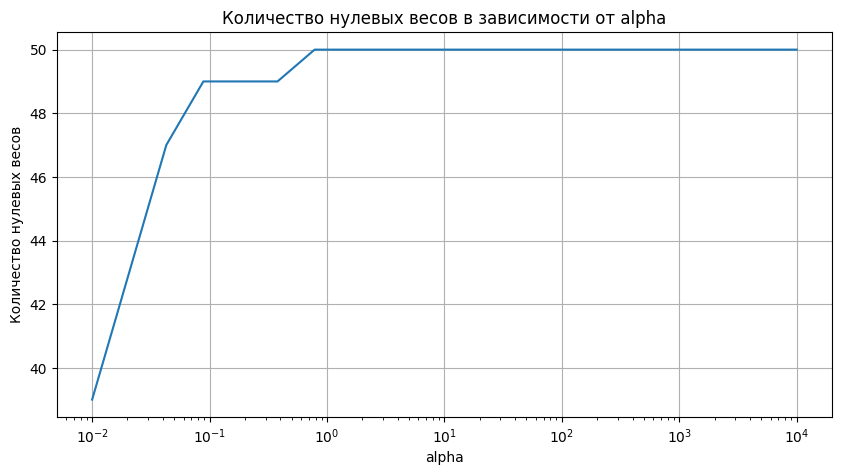

Alpha с помощью которой можно избавиться хотя бы от половины признаков: 0.0100
RMSE: 0.3864


In [1138]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# cоздаем массивы количества нулевых весов и значений rmse
zero_weights = []
rmse_values = []

for alpha in alphas:
    lasso_pipeline.set_params(regression__alpha=alpha) # устанавливаем параметры
    lasso_pipeline.fit(X_train, y_train) # обучаем
    y_pred = lasso_pipeline.predict(X_val) # прогнозируем 
    zero_weights.append(np.sum(lasso_pipeline.named_steps["regression"].coef_ == 0)) # добавляем в массив количество нулевых коэффициентов
    rmse_values.append(root_mean_squared_error(y_val, y_pred)) # добавляем в массив rmse

plt.figure(figsize=(10, 5))
plt.plot(alphas, zero_weights)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("Количество нулевых весов")
plt.title("Количество нулевых весов в зависимости от alpha")
plt.grid(True)
plt.show()

# находим минимальное alpha, при котором отбрасывается хотя бы половина признаков
num_features = len(lasso_pipeline.named_steps["regression"].coef_) / 2
for alpha, rmse, zeros in zip(alphas, rmse_values, zero_weights):
    if zeros >= num_features:
        print(f"Alpha с помощью которой можно избавиться хотя бы от половины признаков: {alpha:.4f}")
        print(f"RMSE: {rmse:.4f}")
        break

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Этот признак может быть потенциально полезным, потому что если маршрут часто используется, то скорее всего там больше пробки, что влияет на длительность поездки
Линейные модели рассматривают каждый признак независимо, поэтому модель не сможет вытащить эту информацию.

In [1139]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pair_counts = (df_train13.group_by(["pickup_cell", "dropoff_cell"]).count().sort("count",  descending=True)) # считаем количество поездок для каждой пары 
# столбец, где первые 100 значений от 1 до 100, остальные -1 
pair_counts = pair_counts.with_columns(pl.concat([pl.Series(range(1, 101)), pl.Series([-1] * (pair_counts.height - 100)) ]).alias("id_pairs"))

# объединяем получившуюся таблицу с нашей
df_train13 = df_train13.join(pair_counts.select(["pickup_cell", "dropoff_cell", "id_pairs"]), on=["pickup_cell", "dropoff_cell"], how="left") 
df_test13 = df_test13.join(pair_counts.select(["pickup_cell", "dropoff_cell", "id_pairs"]), on=["pickup_cell", "dropoff_cell"], how="left") 
print(df_train13)

shape: (986_260, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ pickup_da ┆ pickup_lo ┆ pickup_la ┆ … ┆ is_anomal ┆ haversine ┆ haversine ┆ id_pairs │
│ ---       ┆ tetime    ┆ ngitude   ┆ titude    ┆   ┆ ous       ┆ _to_airpo ┆ _to_shopp ┆ ---      │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ rt        ┆ ing       ┆ i64      │
│           ┆ datetime[ ┆ f64       ┆ f64       ┆   ┆ bool      ┆ ---       ┆ ---       ┆          │
│           ┆ μs]       ┆           ┆           ┆   ┆           ┆ bool      ┆ bool      ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2209155 ┆ 2016-05-0 ┆ -73.97981 ┆ 40.752529 ┆ … ┆ false     ┆ false     ┆ false     ┆ 3        │
│           ┆ 3         ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆ 09:03:08  ┆           ┆           ┆   ┆           ┆     

C:\Users\annat\AppData\Local\Temp\ipykernel_26416\3754836174.py:2: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  pair_counts = (df_train13.group_by(["pickup_cell", "dropoff_cell"]).count().sort("count",  descending=True)) # считаем количество поездок для каждой пары


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [1140]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# добавляем признак, дальше как обычно
features15 = ["weekday", "month", "is_anomalous", "hour", "day", "is_rush_hour", "is_free_road", "id_pairs", 
             "log_haversine", "pickup_cell", "dropoff_cell", "haversine_to_airport", "haversine_to_shopping"]
categorical15 = ["weekday", "month", "is_anomalous", "is_rush_hour", "is_free_road", "haversine_to_airport", "haversine_to_shopping","pickup_cell", "dropoff_cell", "id_pairs" ]
numeric_features = ["hour", "day", "log_haversine"]
target = "log_trip_duration"

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical15),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model15 = pipeline.fit(df_train13.select(features15).to_pandas(), df_train13.select(pl.col("log_trip_duration")).to_pandas())
y_pred = model15.predict(df_test13.select(features15).to_pandas())

results_df = pl.concat([pl.from_numpy(y_pred), df_test13.select(pl.col("log_trip_duration"))], how = "horizontal")
results_df = results_df.rename({results_df.columns[0]: "prediction", results_df.columns[1]: "true value"})

print(results_df)
print("Test RMSE = %.4f" % root_mean_squared_error(df_test13.select(pl.col("log_trip_duration")), y_pred))
gc.collect()

shape: (437_594, 2)
┌────────────┬────────────┐
│ prediction ┆ true value │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 6.673813   ┆ 6.947937   │
│ 6.286123   ┆ 6.719013   │
│ 6.064225   ┆ 6.421622   │
│ 6.650805   ┆ 6.766192   │
│ 8.640567   ┆ 8.510773   │
│ …          ┆ …          │
│ 6.514666   ┆ 6.717805   │
│ 5.97388    ┆ 6.163315   │
│ 6.015925   ┆ 6.171701   │
│ 6.794429   ┆ 7.038784   │
│ 6.637298   ┆ 6.96885    │
└────────────┴────────────┘
Test RMSE = 0.4802


12536

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [1141]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [1142]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [1143]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

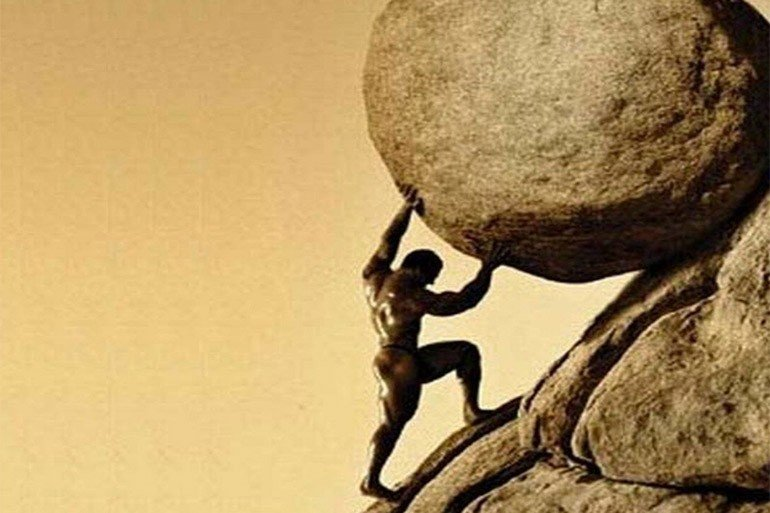